# Evaluate the GPT model performance

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

# Load the labelled data

In [2]:
df = pd.read_csv("data/entry_label_assign_gpt_labelled.csv")
len(df)

2149

# Clean-up the prediction a bit

In [3]:
df["gpt_pred_sup"].value_counts()

gpt_pred_sup
Other                        569
Order                        402
Notice                       300
Request / Motion             283
Minute Entry                 151
Reply / Response              52
Summon                        51
Brief / Memorandum of Law     48
Complaint                     46
Report                        43
Judgment                      26
Multiple                      23
Stipulation                   22
Answer                        19
Proposed Court Filings        18
Warrant                       17
Petition                      16
Waiver                        13
Indictment                    11
Civil Cover Sheet              8
Arrest                         7
Objection                      7
Plea Agreement                 7
Errata                         4
Amended Complaint              3
Verdict                        2
Response                       1
Name: count, dtype: int64

In [4]:
df['gpt_pred_sup'] = np.where(df['gpt_pred_sup'] == "Response", "Reply / Response", df['gpt_pred_sup'])
df['gpt_pred_sup'] = np.where(df['gpt_pred_sup']=="Amended Complaint", "Complaint", df['gpt_pred_sup'])

In [5]:
df["gpt_pred_sup"].value_counts()

gpt_pred_sup
Other                        569
Order                        402
Notice                       300
Request / Motion             283
Minute Entry                 151
Reply / Response              53
Summon                        51
Complaint                     49
Brief / Memorandum of Law     48
Report                        43
Judgment                      26
Multiple                      23
Stipulation                   22
Answer                        19
Proposed Court Filings        18
Warrant                       17
Petition                      16
Waiver                        13
Indictment                    11
Civil Cover Sheet              8
Objection                      7
Plea Agreement                 7
Arrest                         7
Errata                         4
Verdict                        2
Name: count, dtype: int64

In [6]:
df["gpt_pred_sup"].nunique()

25

In [7]:
df["flp_sup"].nunique()

25

In [8]:
df["flp_sup"].value_counts()

flp_sup
Other                        561
Order                        409
Notice                       292
Request / Motion             286
Minute Entry                 136
Brief / Memorandum of Law     53
Reply / Response              52
Summon                        51
Complaint                     49
Report                        42
Errata                        39
Judgment                      29
Stipulation                   22
Answer                        20
Warrant                       17
Petition                      16
Waiver                        13
Indictment                    11
Proposed Court Filings        10
Civil Cover Sheet              8
Verdict                        8
Objection                      7
Plea Agreement                 7
Arrest                         7
Multiple                       4
Name: count, dtype: int64

# Run the eval

In [9]:
y_true = df["flp_sup"]
y_pred = df["gpt_pred_sup"]

In [10]:
labels = np.unique(np.concatenate((y_true, y_pred)))
len(labels)

25

In [11]:
report = classification_report(y_true, y_pred)
print(report)

                           precision    recall  f1-score   support

                   Answer       1.00      0.95      0.97        20
                   Arrest       1.00      1.00      1.00         7
Brief / Memorandum of Law       0.98      0.89      0.93        53
        Civil Cover Sheet       1.00      1.00      1.00         8
                Complaint       1.00      1.00      1.00        49
                   Errata       1.00      0.10      0.19        39
               Indictment       1.00      1.00      1.00        11
                 Judgment       1.00      0.90      0.95        29
             Minute Entry       0.89      0.99      0.93       136
                 Multiple       0.17      1.00      0.30         4
                   Notice       0.73      0.75      0.74       292
                Objection       1.00      1.00      1.00         7
                    Order       0.99      0.98      0.98       409
                    Other       0.85      0.86      0.85     

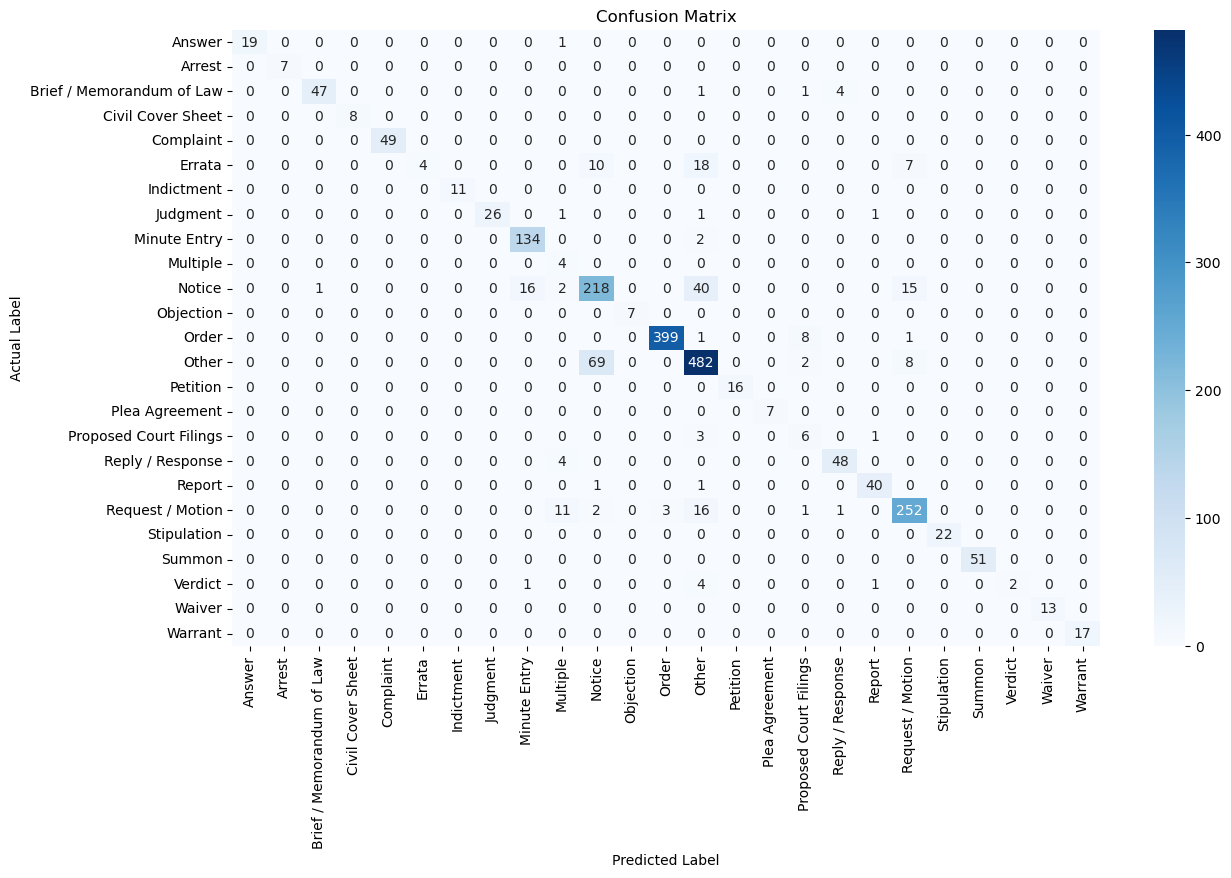

In [12]:
# Compute confusion matrix

cm = confusion_matrix(y_true, y_pred, labels=labels)

# Plot confusion matrix using seaborn
plt.figure(figsize=(14, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()